In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc
import uncertainties.unumpy as unp
from uncertainties import ufloat

In [3]:
p, count1, count2, count3, count4, count5 = np.loadtxt("../data/counts_pump.csv", unpack=True, delimiter=",")
p = p*100

In [4]:
count = np.mean([count1, count2, count3, count4, count5], axis=0)
count_err = np.std([count1, count2, count3, count4, count5], axis=0)

counts = unp.uarray(count, count_err)
print(counts)

[2.4+/-0.4898979485566356 4.4+/-0.7999999999999999
 6.4+/-0.7999999999999999 8.4+/-0.7999999999999999
 10.4+/-0.7999999999999999 12.4+/-0.7999999999999999
 14.4+/-0.7999999999999999 16.6+/-0.7999999999999999
 18.6+/-0.7999999999999999 20.8+/-0.7483314773547882
 23.4+/-0.7999999999999999 25.4+/-0.7999999999999999
 27.4+/-0.7999999999999999 29.6+/-1.2000000000000002
 31.6+/-1.2000000000000002 33.6+/-1.2000000000000002
 36.2+/-0.9797958971132711 39.0+/-2.5298221281347035
 41.2+/-2.4000000000000004 42.4+/-2.8]


In [5]:
lam = 633e-9
L = ufloat(100e-3, 0.1e-3)

n = (counts*lam)/L + 1

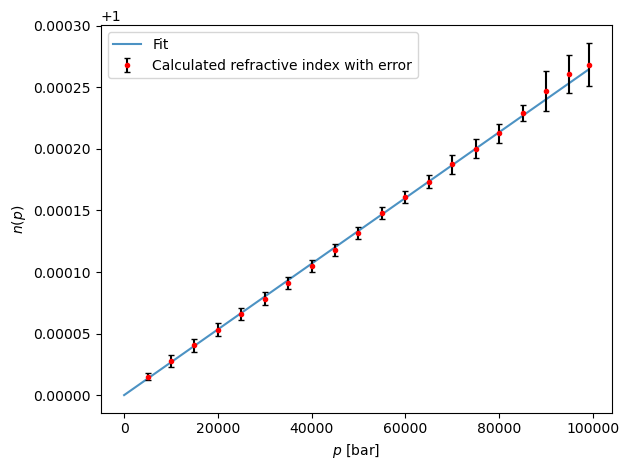

In [6]:
def linear(x, a, b):
    return a*x + b

from scipy.optimize import curve_fit

popt, pcov = curve_fit(linear, p, unp.nominal_values(n), sigma=unp.std_devs(n))
popt_err = np.sqrt(np.diag(pcov))

x = np.linspace(0, max(p), 1000)

plt.plot(x, linear(x, *popt), label="Fit", alpha=0.8)
plt.errorbar(p, unp.nominal_values(n), yerr=unp.std_devs(n), fmt='r.', ecolor='black', capsize = 2, capthick=1, label='Calculated refractive index with error')
plt.xlabel(r'$p$ [bar]')
plt.ylabel(r'$n(p)$')
plt.legend()
plt.tight_layout()

In [7]:
print("a = ", popt[0], "+-", popt_err[0])
print("b = ", popt[1], "+-", popt_err[1])

a =  2.667197673992787e-09 +- 1.5866097178411554e-11
b =  1.0000001024440983 +- 7.260690649327158e-07


(5.2752+/-0.0034)e-09
(4.2915+/-0.0024)e-06


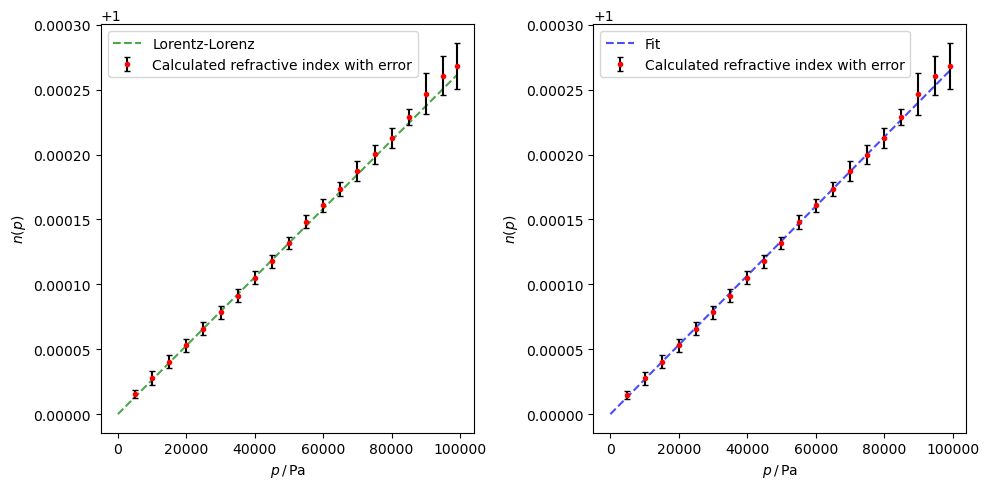

In [8]:
def lorentz_lorenz(p, A, R, T):
    return np.sqrt((3*A*p)/(R*T) + 1)

T = ufloat(273.15+20.4, 0.1)
R = 8.314
A_oxygen = 4.000
A_nitrogen = ufloat(4.369,0.003)

A = (0.21*A_oxygen + 0.79*A_nitrogen)*1e-6 # inm^3/mol

p1 = np.linspace(0, max(p), 1000)

slope = 3*A/(R*T)
print(slope)
print(A)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(p1, lorentz_lorenz(p1, A.nominal_value, R, T.nominal_value), label="Lorentz-Lorenz", linestyle="--", color="green", alpha=0.7)
ax[0].errorbar(p, unp.nominal_values(n), yerr=unp.std_devs(n), fmt='r.', ecolor='black', capsize = 2, capthick=1, label='Calculated refractive index with error')
ax[0].set_xlabel(r'$p\,/\,$Pa')
ax[0].set_ylabel(r'$n(p)$')
ax[0].legend()

ax[1].plot(x, linear(x, *popt), label="Fit", linestyle="--", color="blue", alpha=0.7)
ax[1].errorbar(p, unp.nominal_values(n), yerr=unp.std_devs(n), fmt='r.', ecolor='black', capsize = 2, capthick=1, label='Calculated refractive index with error')
ax[1].set_xlabel(r'$p\,/\,$Pa')
ax[1].set_ylabel(r'$n(p)$')
ax[1].legend()

plt.tight_layout()
plt.savefig("../build/air_and_lorentz.pdf")

In [10]:
lorentz_value = lorentz_lorenz(101300, A.nominal_value, R, 273.15+15)
regressed_value = linear(101300, *popt)
print("Lorentz-Lorenz: ", lorentz_value)
print("Regressed: ", regressed_value)

Lorentz-Lorenz:  1.0002721592469288
Regressed:  1.0002702895684739
